In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [12]:
# Read the dataset
url = "https://data.cityofnewyork.us/api/views/6fi9-q3ta/rows.csv?accessType=DOWNLOAD"
df = pd.read_csv(url)

# Display first few rows to understand the dataset
df.head()


,hour_beginning,location,Pedestrians,Towards Manhattan,Towards Brooklyn,weather_summary,temperature,precipitation,lat,long,events,Location1
0,04/30/2019 12:00:00 AM,Brooklyn Bridge,3,3,0,NaN,NaN,NaN,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
1,12/31/2019 10:00:00 PM,Brooklyn Bridge,10,9,1,cloudy,42.0,0.0005,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
2,12/31/2019 11:00:00 PM,Brooklyn Bridge,2,0,2,cloudy,42.0,0.0004,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
3,12/31/2019 09:00:00 PM,Brooklyn Bridge,12,0,12,cloudy,42.0,0.0036,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"
4,04/01/2019 03:00:00 AM,Brooklyn Bridge,1,0,1,clear-night,36.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)"


In [14]:
df['hour_beginning'] = pd.to_datetime(df['hour_beginning'], format='%m/%d/%Y %I:%M:%S %p')

In [15]:
df['Year'] = df['hour_beginning'].dt.year
df['Day_of_Week'] = df['hour_beginning'].dt.dayofweek  # 0 = Monday, 6 = Sunday
df['Hour'] = df['hour_beginning'].dt.hour

In [16]:
df.head()

,hour_beginning,location,Pedestrians,Towards Manhattan,Towards Brooklyn,weather_summary,temperature,precipitation,lat,long,events,Location1,Year,Day_of_Week,Hour
0,2019-04-30 00:00:00,Brooklyn Bridge,3,3,0,NaN,NaN,NaN,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",2019,1,0
1,2019-12-31 22:00:00,Brooklyn Bridge,10,9,1,cloudy,42.0,0.0005,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",2019,1,22
2,2019-12-31 23:00:00,Brooklyn Bridge,2,0,2,cloudy,42.0,0.0004,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",2019,1,23
3,2019-12-31 21:00:00,Brooklyn Bridge,12,0,12,cloudy,42.0,0.0036,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",2019,1,21
4,2019-04-01 03:00:00,Brooklyn Bridge,1,0,1,clear-night,36.0,0.0000,40.708164,-73.999509,NaN,"(40.7081639691088, -73.9995087014816)",2019,0,3


Question 1: Filter for Weekdays and Plot Pedestrian Counts

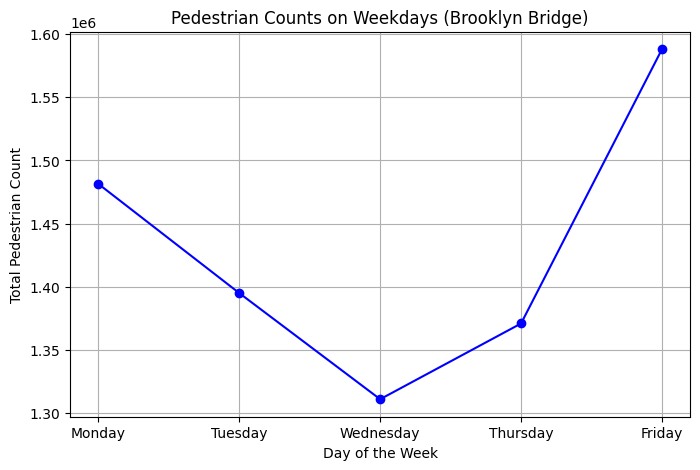

In [17]:
df_weekdays = df[df['Day_of_Week'] < 5]

weekday_counts = df_weekdays.groupby('Day_of_Week')['Pedestrians'].sum()

weekday_labels = {0: "Monday", 1: "Tuesday", 2: "Wednesday", 3: "Thursday", 4: "Friday"}
weekday_counts.index = weekday_counts.index.map(weekday_labels)

plt.figure(figsize=(8, 5))
plt.plot(weekday_counts.index, weekday_counts.values, marker='o', linestyle='-', color='b')
plt.xlabel("Day of the Week")
plt.ylabel("Total Pedestrian Count")
plt.title("Pedestrian Counts on Weekdays (Brooklyn Bridge)")
plt.grid(True)
plt.show()


Question 2: Analyze Weather Conditions' Influence on Pedestrian Counts in 2019

In [20]:
print(df_2019_encoded.dtypes)


hour_beginning                         datetime64[ns]
location                                       object
Pedestrians                                     int64
Towards Manhattan                               int64
Towards Brooklyn                                int64
temperature                                   float64
precipitation                                 float64
lat                                           float64
long                                          float64
events                                         object
Location1                                      object
Year                                            int32
Day_of_Week                                     int32
Hour                                            int32
weather_summary_clear-day                        bool
weather_summary_clear-night                      bool
weather_summary_cloudy                           bool
weather_summary_fog                              bool
weather_summary_partly-cloud

In [21]:
correlation_matrix = df_2019_encoded.select_dtypes(include=['number']).corr()


In [22]:
df_2019_encoded = pd.get_dummies(df_2019, columns=['weather_summary'], drop_first=True)


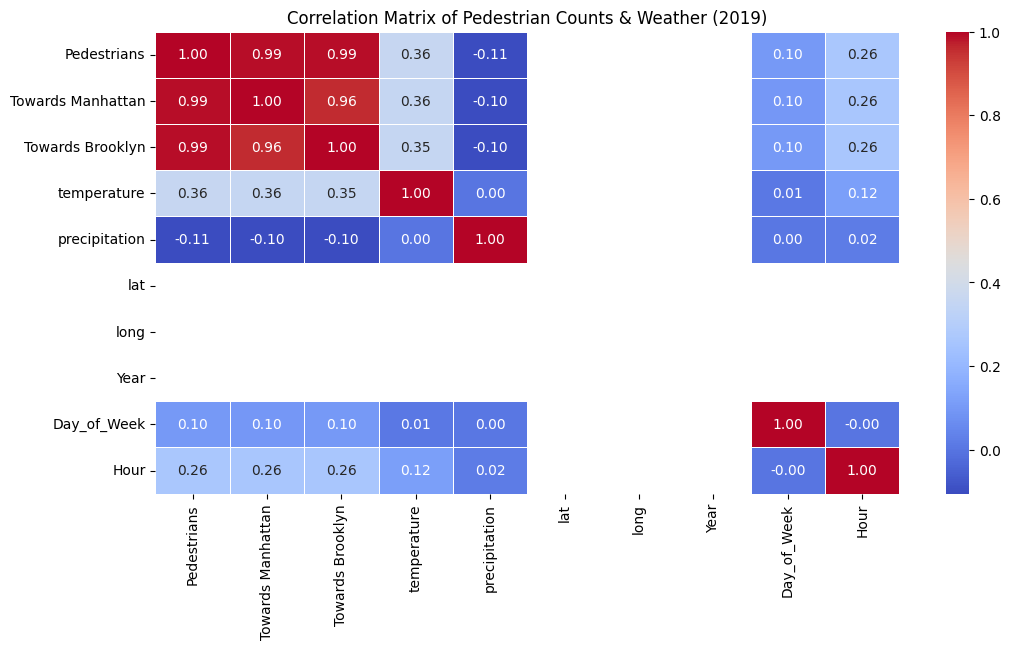

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Pedestrian Counts & Weather (2019)")
plt.show()


Question 3: Categorize Time of Day and Analyze Pedestrian Activity

In [25]:
# Define function to categorize time of day
def categorize_time(hour):
    if 5 <= hour < 12:
        return "Morning"
    elif 12 <= hour < 17:
        return "Afternoon"
    elif 17 <= hour < 21:
        return "Evening"
    else:
        return "Night"

# Apply function to create new column
df['Time_of_Day'] = df['Hour'].apply(categorize_time)

# Display sample rows
df[['hour_beginning', 'Hour', 'Time_of_Day']].head()


,hour_beginning,Hour,Time_of_Day
0,2019-04-30 00:00:00,0,Night
1,2019-12-31 22:00:00,22,Night
2,2019-12-31 23:00:00,23,Night
3,2019-12-31 21:00:00,21,Night
4,2019-04-01 03:00:00,3,Night


C:\Users\Vedangi Sawant\AppData\Local\Temp\ipykernel_19952\3600002319.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=time_activity.index, y=time_activity.values, palette="viridis")


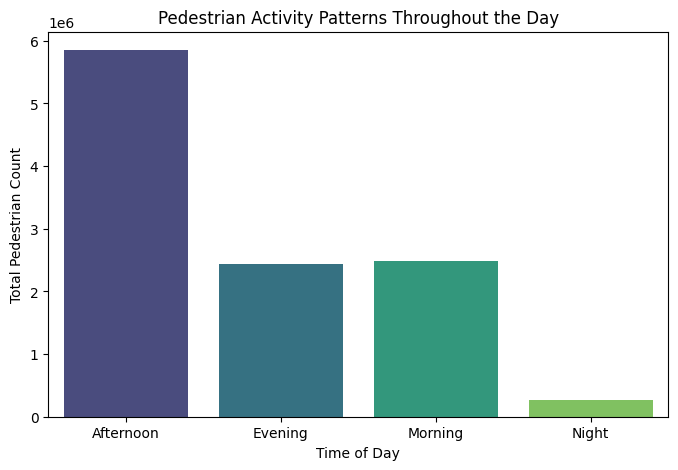

In [26]:
# Group by time of day and sum pedestrian counts
time_activity = df.groupby("Time_of_Day")['Pedestrians'].sum()

# Plot pedestrian activity based on time of day
plt.figure(figsize=(8, 5))
sns.barplot(x=time_activity.index, y=time_activity.values, palette="viridis")
plt.xlabel("Time of Day")
plt.ylabel("Total Pedestrian Count")
plt.title("Pedestrian Activity Patterns Throughout the Day")
plt.show()
